## A notebook that finds your look a like from the dataset that consists of 1600 images so don't expect the best results.

In [1]:
import scipy.io
import numpy as np


from datetime import datetime, timedelta
import time

import tensorflow as tf


import keras 
from keras.preprocessing import image


from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Activation
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Model, Sequential
from keras import metrics
from keras.models import model_from_json

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array 
import cv2
from tensorflow.keras.preprocessing import image
import pandas as pd


In [2]:

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf
from keras import backend as K

In [3]:
#open-cv's face detection module
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [4]:
import os
from pathlib import Path
#Change directory to root
path = Path(os.getcwd())
root_dir = path.parent.absolute()
os.chdir(str(root_dir))

In [5]:
#Get all the images names in a list 
r="/data/combined"
mypath=str(root_dir)+r
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['00003 (2).jpg',
 '00003.jpg',
 '00010 (2).jpg',
 '00010.jpg',
 '00016 (2).jpg',
 '00016.jpg',
 '00018 (2).jpg',
 '00018.jpg',
 '00020 (2).jpg',
 '00020.jpg',
 '00022 (2).jpg',
 '00022.jpg',
 '00025 (2).jpg',
 '00025.jpg',
 '00030 (2).jpg',
 '00030.jpg',
 '00035 (2).jpg',
 '00035.jpg',
 '00042 (2).jpg',
 '00042.jpg',
 '00047 (2).jpg',
 '00047.jpg',
 '00051 (2).jpg',
 '00051.jpg',
 '00062 (2).jpg',
 '00062.jpg',
 '00066 (2).jpg',
 '00066.jpg',
 '00068 (2).jpg',
 '00068.jpg',
 '00070 (2).jpg',
 '00070.jpg',
 '00072 (2).jpg',
 '00072.jpg',
 '00074 (2).jpg',
 '00074.jpg',
 '00075 (2).jpg',
 '00075.jpg',
 '00076 (2).jpg',
 '00076.jpg',
 '00080 (2).jpg',
 '00080.jpg',
 '00083 (2).jpg',
 '00083.jpg',
 '00087 (2).jpg',
 '00087.jpg',
 '00088 (2).jpg',
 '00088.jpg',
 '00089 (2).jpg',
 '00089.jpg',
 '00099 (2).jpg',
 '00099.jpg',
 '00101 (2).jpg',
 '00101.jpg',
 '00103 (2).jpg',
 '00103.jpg',
 '00104 (2).jpg',
 '00104.jpg',
 '00105 (2).jpg',
 '00105.jpg',
 '00130 (2).jpg',
 '00130.jpg',
 '00138 

In [6]:
#Building the VGGFace model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [7]:
#Loading the vggface model weights
#Pretrained weights: https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
#Download it and put it in the same folder as the notebook.
from keras.models import model_from_json
model.load_weights(str(path) +'/vgg_face_weights.h5')

In [8]:
#removing the last two layers so that we only present the images in the embedding
vgg_face_descriptor = Model(inputs=model.layers[0].input
, outputs=model.layers[-2].output)

In [9]:

mypath=str(root_dir)+'/pickle/VGG/'
v=pd.read_pickle(mypath+ 'combinedVGG.pkl')
v

,path,VGG
0,00003 (2).jpg,"[2.358688, -1.7594296, 1.6152322, 3.0069342, 0..."
1,00003.jpg,"[3.060477, -0.13289273, 0.90607125, 1.5627009,..."
2,00010 (2).jpg,"[1.7589378, -2.4950275, -1.542548, 2.465595, 0..."
3,00010.jpg,"[-0.21445937, -2.0057573, -0.55780536, 4.06871..."
4,00016 (2).jpg,"[-1.0276625, -1.8849767, 0.28857058, 2.1206589..."
...,...,...
1595,06005.jpg,"[4.4966297, -4.1108065, -2.2082958, 2.8996317,..."
1596,07182 (2).jpg,"[3.056606, 0.4640472, 0.61385614, 4.250695, -0..."
1597,07182.jpg,"[5.584604, -0.2810822, -0.2076623, 2.4632146, ..."
1598,07183 (2).jpg,"[4.674432, -0.50923884, -1.8016448, 3.9365911,..."


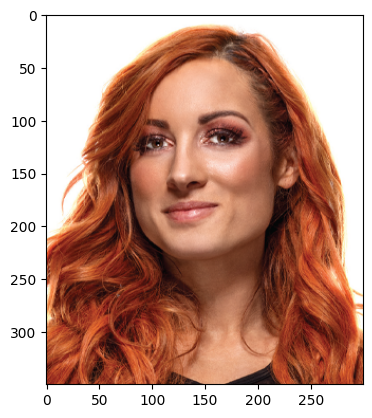

In [10]:
t="/data/test/"
mypath=str(root_dir)+t
img = cv2.imread(mypath + "becky.png") #pixel values in scale of 0-255
#img = cv2.imread("sefik_2.jpg") #pixel values in scale of 0-255

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

faces = face_cascade.detectMultiScale(img, 1.3, 5)

for (x,y,w,h) in faces:
    detected_face = img[int(y):int(y+h), int(x):int(x+w)]
    
    #cv2.rectangle(img,(x,y),(x+w,y+h),(128,128,128),cv2.FILLED)
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    #add 15% margin around the face
    try:
        margin = 10
        margin_x = int((w * margin)/100); margin_y = int((h * margin)/100)
        detected_face = img[int(y-margin_y):int(y+h+margin_y), int(x-margin_x):int(x+w+margin_x)]
    except:
        print("detected face has no margin")
    
    detected_face = cv2.resize(detected_face, (224, 224))

#plt.imshow(detected_face)
#plt.imshow(cv2.cvtColor(detected_face, cv2.COLOR_BGR2RGB))











In [11]:
img_pixels = image.img_to_array(detected_face)
img_pixels = np.expand_dims(img_pixels, axis = 0)
img_pixels /= 127.5
img_pixels -= 1


In [12]:
yourself_representation = vgg_face_descriptor.predict(img_pixels)[0,:]

1/1 [==============================] - 1s 1s/step


In [13]:
yourself_representation


array([ 0.01313155,  0.00837165, -0.00334478, ..., -0.03393243,
        0.03793184,  0.04265571], dtype=float32)

In [14]:
def findCosineSimilarity(source_representation, test_representation=yourself_representation):
    try:
        a = np.matmul(np.transpose(source_representation), test_representation)
        b = np.sum(np.multiply(source_representation, source_representation))
        c = np.sum(np.multiply(test_representation, test_representation))
        return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
    except:
        return 10 #assign a large value. similar faces will have small value.

In [15]:
v['similarity'] = v['VGG'].apply(findCosineSimilarity)

In [16]:
v

,path,VGG,similarity
0,00003 (2).jpg,"[2.358688, -1.7594296, 1.6152322, 3.0069342, 0...",0.759012
1,00003.jpg,"[3.060477, -0.13289273, 0.90607125, 1.5627009,...",0.712685
2,00010 (2).jpg,"[1.7589378, -2.4950275, -1.542548, 2.465595, 0...",0.948287
3,00010.jpg,"[-0.21445937, -2.0057573, -0.55780536, 4.06871...",0.751517
4,00016 (2).jpg,"[-1.0276625, -1.8849767, 0.28857058, 2.1206589...",0.454716
...,...,...,...
1595,06005.jpg,"[4.4966297, -4.1108065, -2.2082958, 2.8996317,...",0.828198
1596,07182 (2).jpg,"[3.056606, 0.4640472, 0.61385614, 4.250695, -0...",0.780839
1597,07182.jpg,"[5.584604, -0.2810822, -0.2076623, 2.4632146, ...",0.847914
1598,07183 (2).jpg,"[4.674432, -0.50923884, -1.8016448, 3.9365911,...",0.825899


In [17]:
d=v.sort_values(by=['similarity'], ascending=True)
d

,path,VGG,similarity
1477,05761.jpg,"[-0.4532899, -2.3486524, -4.3759565, 0.7255946...",0.363272
50,00099 (2).jpg,"[1.7646525, -0.23793928, -0.70154935, 0.554625...",0.377990
1047,04678.jpg,"[1.1438198, 2.6095433, 2.8159626, 6.666186, 4....",0.381862
1081,04753.jpg,"[-1.7760398, 0.44950974, -0.63123405, 5.170897...",0.383011
126,00625 (2).jpg,"[0.5484611, 1.7339258, -1.0598162, 1.8120707, ...",0.388090
...,...,...,...
1263,05350.jpg,"[2.1734343, -2.8138826, 0.6528103, 1.667331, 0...",0.957765
349,01675.jpg,"[1.6702132, -1.8982441, -1.9299111, 2.8110454,...",0.981708
1005,04538.jpg,"[1.5332423, -1.0276291, -1.3084279, 3.1103039,...",0.990905
696,03292 (2).jpg,"[2.383521, 1.7808402, -0.08600661, 1.5778434, ...",1.025280


05761.jpg
0.36327171325683594


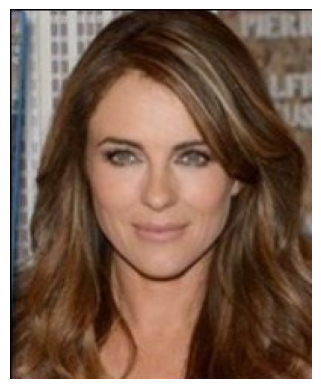

-------------------------
00099 (2).jpg
0.37798982858657837


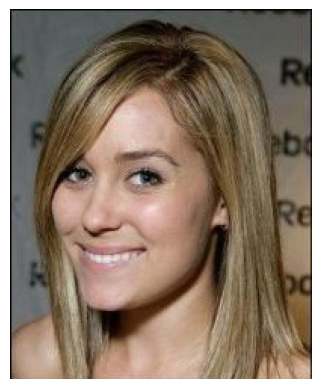

-------------------------
04678.jpg
0.3818620443344116


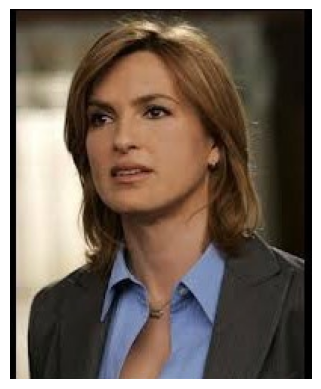

-------------------------


In [18]:

if True:
    for i in range(0, 3):
        instance = d.iloc[i]
        print(instance['path'])
        similarity = instance['similarity']
        
        #img = instance['pixels']
        full_path = str(root_dir) + '/data/combined/' + instance['path']
        
        img = cv2.imread( full_path)
        
        print(similarity) 

        plt.axis('off')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()

        print("-------------------------")